<a href="https://colab.research.google.com/github/jchen8000/MLDLwithPython/blob/main/3_03_Advanced_Functions/Advanced_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Advanced Functions

This section introduces some commonly used functions as well as their derivatives, they are widely used for machine learning and data sciences.

In [1]:
import numpy as np
import sympy as sym
from sympy.plotting import plot
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import norm

Define a function to plot the function and derivative using *sympy* and *matplotlib* libraries.

In [2]:
def plot_function_derivative(function, derivative, xlim, ylim, exp_function, exp_derivative, savefile, draw_derivative=True):
  # Set plot parameters
  plt.rcParams['figure.figsize'] = 8, 6
  plt.rcParams['legend.fontsize'] = 16
  plt.rcParams['legend.loc'] = "upper left"
  plt.rcParams['axes.grid'] = True
  plt.rcParams['axes.labelsize'] = 12
  plt.rcParams['grid.linestyle'] = '--'
  plt.rcParams['savefig.transparent'] = True
  plt.rcParams['savefig.bbox'] = 'tight'  
  # Plot the function
  plot_func = plot( function, 
            xlim=xlim, ylim=ylim, 
            show=False, 
            line_color='k', 
            legend=True, 
            label=exp_function)
  # Plot the derivative
  if draw_derivative:
    plot_deri = plot( derivative, 
              xlim=xlim, 
              show=False, 
              line_color='navy', 
              legend=True, 
              label=exp_derivative)
    plot_func.extend(plot_deri)
    plot_func.ylabel = "f(x) / f'(x)"
  else:
    plot_func.ylabel = "f(x)"
    # plot_func.legend = False
  # Save the plot
  if savefile is not None:
    plot_func.save(savefile)
  # Show the plot
  plot_func.show()

## 1.1 Identity (or Linear) Function

The identity function, also called linear function, always returns the same
value that was used as its argument.

It is defined as:

$f(x)=x$

and its derivative is defined as:

$f'(x)=\frac{d}{dx}f(x)=1$

As show in below figure, the red is the function, the blue is its derivative.

This is a linear transformation and quite simple but is limited in its capacity
to learn complex functional mappings and solve complex problems. The reason is because no matter how many layers of the linear function, they behave just like a single layer because summing up all the layers will give another linear function, which exactly same as a single layer of the linear function.

Another problem is that its derivative is a constant, it has no relation to the input data $x$, the constant value loses the information of the input data and then not able to provide any better calculation.

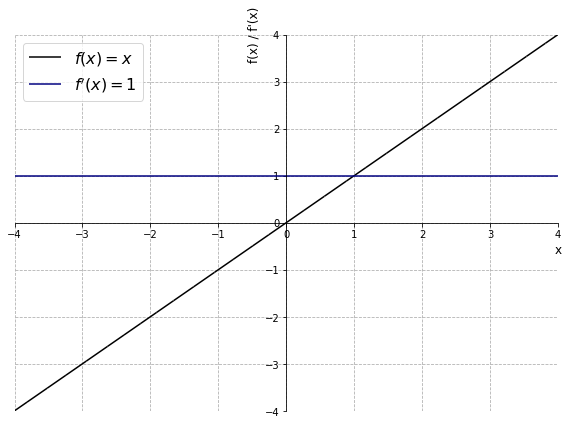

In [3]:
def linear(x):
  return x

x = sym.Symbol('x')
function = linear(x)
derivative = sym.diff( function )

plot_function_derivative(function, derivative, 
                         xlim = [-4.0, 4.0], 
                         ylim = [-4.0, 4.0], 
                         exp_function = r"$f(x)="+sym.latex(function)+"$", 
                         exp_derivative = r"$f'(x)="+sym.latex(derivative)+"$", 
                         savefile = "function_linear.svg")

## 1.2 Sigmoid (or Logistic) Function

The Sigmoid, or Logistic, is a non-linear function and defined as:

$f(x)=\Large\frac{1}{1 + e^{-x}}$

and its derivative is defined as:

$f'(x)=\frac{d}{dx}f(x)=f(x)(1-f(x))=\Large\frac{e^{- x}}{\left(1 + e^{- x}\right)^{2}}$

As show in below figure, the red is Sigmoid function, the blue is its derivative.

The Sigmoid function gives an “S” shaped curve between 0 and 1. It’s one
of the most widely used non-linear activation functions. It transforms the input values into the range between 0 and 1. The output is assumed to be
1 if it’s near 1, (say >=0.95); and 0 if it’s near 0, (say <= 0.05).
This function is often used for classification problems in data sciences.

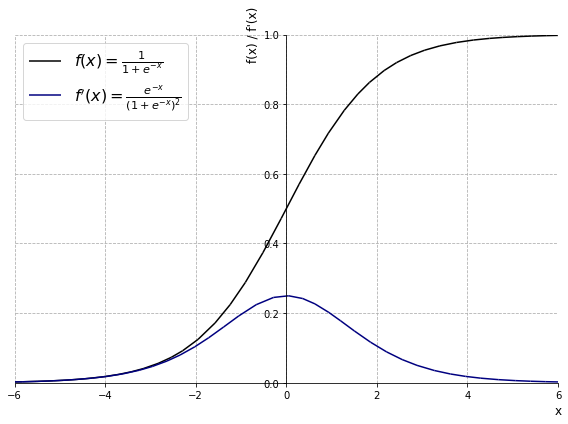

In [4]:
def sigmoid(x):
  return 1/(1+sym.exp(-x))

x = sym.Symbol('x')
function = sigmoid(x)
derivative = sym.diff( function )

plot_function_derivative(function, derivative, 
                         xlim = [-6.0, 6.0], 
                         ylim = [0, 1.0], 
                         exp_function = r"$f(x)="+sym.latex(function)+"$", 
                         exp_derivative = r"$f'(x)="+sym.latex(derivative)+"$", 
                         savefile = "function_sigmoid.svg")


## 1.3 Tanh Function

Tanh function is another non-linear function, it’s similar to Sigmoid and
gives an “S” shaped curve but zero centered, between -1 to 1.

It’s defined as:

$f(x)=\Large\frac{e^{x} - e^{- x}}{e^{x} + e^{- x}}$

The derivative function is defined as:

$f'(x)=\frac{d}{dx}f(x)=1-f(x)^2=\Large\frac{\left(- e^{x} + e^{- x}\right) \left(e^{x} - e^{- x}\right)}{\left(e^{x} + e^{- x}\right)^{2}} + 1$

Tanh function is another non-linear function, it’s similar to Sigmoid and
gives an “S” shaped curve but zero centered, between -1 to 1. Sometimes Tanh function works better than Sigmoid when negative input values are presented.

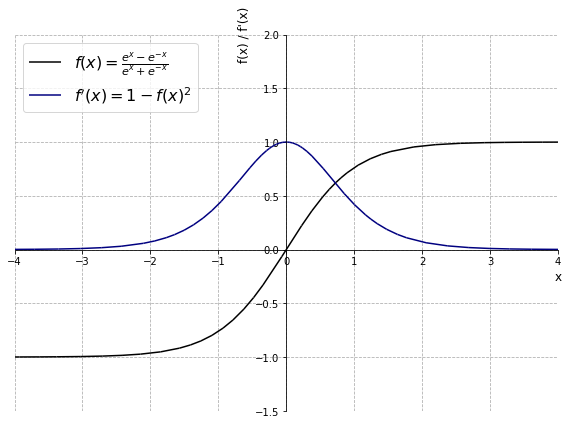

In [5]:
def tanh(x):
	return (sym.exp(x) - sym.exp(-x)) / (sym.exp(x) + sym.exp(-x))

x = sym.Symbol('x')
function = tanh(x)
derivative = sym.diff( function )

plot_function_derivative(function, derivative, 
                         xlim = [-4.0, 4.0], 
                         ylim = [-1.5, 2.0], 
                         exp_function = r"$f(x)="+sym.latex(function)+"$", 
                         exp_derivative = r"$f'(x)=1-f(x)^2$", 
                         savefile = "function_tanh.svg")

## 1.4 ReLU (Rectified Linear Unit) Function

ReLU, or Rectified Linear Unit, is a partial linear function, it’s same as
identity function when input is positive, otherwise it will output zero.

It is defined as:

$f(x)=\max\left(0, x\right)$

The derivative is:

$f'(x)=1$ when $x>0$

$f'(x)=0$ when $x<0$

ReLU function is simple and computationally efficient, it’s very quick to
converge. However, it’s not good for negative input data because it always
returns 0 when input data is negative.

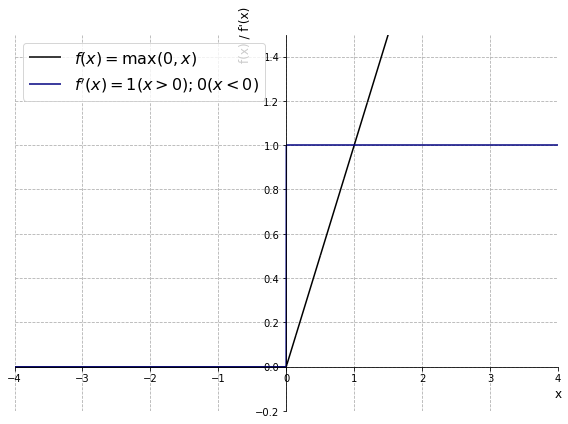

In [6]:
def relu(x):
	return sym.Max(0, x)

x = sym.Symbol('x')
function = relu(x)
derivative = sym.diff( function )

plot_function_derivative(function, derivative, 
                         xlim = [-4.0, 4.0], 
                         ylim = [-0.2, 1.5], 
                         exp_function = r"$f(x)="+sym.latex(function)+"$", 
                         exp_derivative = r"$f'(x)=1 (x>0); 0 (x<0)$", 
                         savefile = "function_relu.svg")

## 1.5 Leaky ReLU Function

Leaky ReLU is a variation of ReLU function, it is defined as:

It is defined as:

$f(x)=\max\left(x, \epsilon x\right)$, where $\epsilon$ is something like 0.1 or 0.01.

The derivative is:

$f'(x)=1$ when $x>0$

$f'(x)=\epsilon$ when $x<0$

Since the ReLU function returns zero when input data is negative, Leaky
ReLU improves it by adding a small slope in the negative area, so it can
handle the negative data. Normally the value of ε is something like 0.01 to
0.1.

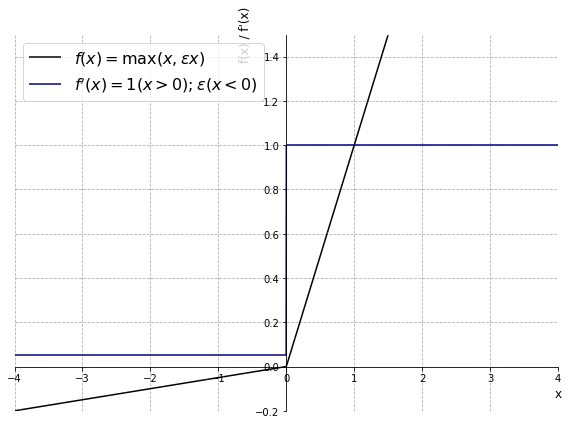

In [7]:
def leaky_relu(x, epsilon):
	return sym.Max(epsilon*x, x)

x = sym.Symbol('x')
e = sym.Symbol("epsilon", positive = True)
e = 0.05
function = leaky_relu(x, e)
derivative = sym.diff( function )

plot_function_derivative(function, derivative,
                         xlim = [-4.0, 4.0], 
                         ylim = [-0.2, 1.5], 
                         exp_function = r"$f(x)=\max\left(x, \epsilon x\right)$", 
                         exp_derivative = r"$f'(x)=1 (x>0); \epsilon (x<0)$", 
                         savefile = "function_leakyrelu.svg")

## 1.6 Gaussian Function

Gaussian function is also a non-linear function, it's widely used in many areas of science, engineering, data analysis and machine learning.

The simplest form of Gaussian function is defined as:

$f(x)=e^{- x^{2}}$

and its derivative is:

$f'(x)=-2xe^{- x^{2}}$

In the below figure, red is gaussian function and blue is its derivative.


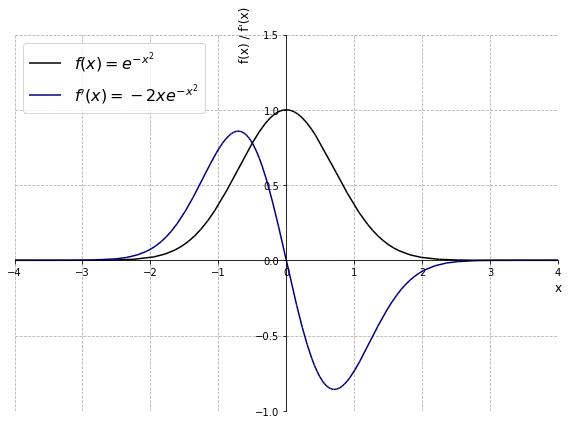

In [8]:
def gaussian(x):
	return sym.exp(-x**2)

x = sym.Symbol('x')
function = gaussian(x)
derivative = sym.diff( function )

plot_function_derivative(function, derivative,
                         xlim = [-4.0, 4.0], 
                         ylim = [-1.0, 1.5], 
                         exp_function = r"$f(x)="+sym.latex(function)+"$", 
                         exp_derivative = r"$f'(x)="+sym.latex(derivative)+"$", 
                         savefile = "function_gaussian.svg")

## 1.7 Normal Distribution

Normal distribution is based on gaussian function, a normal distribution has a variable $x$ with a mean $\mu$ and a standard deviation $\sigma$, its variance is noted as $\sigma^2$

Normal distribution is defined as:

$P(x)=\Large\frac{1}{ \sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$

This is implemented by Python as:
```
  c = 1 / ( sigma * (2 * np.pi)**0.5 )
  e = ( (x-mu)/sigma )**2
  return c * np.e**(-0.5 * e)
```

Below, define the normal distribution function based on above formula. And for testing purpose the *scipy.stats.norm()* function is used as reference.

In [9]:
# Define normal distribution function based on above formula
def normal_distribution(x, mu, sigma):
  c = 1 / ( sigma * (2 * np.pi)**0.5 )
  e = ( (x-mu)/sigma )**2
  return c * np.e**(-0.5 * e)  

# Test the above function by comparing it with scipy.stats.norm() 
mu = 1.0
sigma = 0.5
x = np.random.uniform(size=(10))
y1 = normal_distribution(x, mu, sigma)  # the above function
y2 = norm.pdf(x, mu, sigma)             # scipy.stats.norm()
for i in range(len(x)):
    print("x =", round(x[i],6), 
          "\ty1 =", round(y1[i],6), 
          ";\ty2 =", round(y2[i],6), 
          ";\ty1==y2?",np.isclose(y1[i], y2[i], atol=1e-6))

x = 0.689327 	y1 = 0.657818 ;	y2 = 0.657818 ;	y1==y2? True
x = 0.483472 	y1 = 0.46795 ;	y2 = 0.46795 ;	y1==y2? True
x = 0.1307 	y1 = 0.17602 ;	y2 = 0.17602 ;	y1==y2? True
x = 0.810827 	y1 = 0.742773 ;	y2 = 0.742773 ;	y1==y2? True
x = 0.677342 	y1 = 0.647907 ;	y2 = 0.647907 ;	y1==y2? True
x = 0.91699 	y1 = 0.786964 ;	y2 = 0.786964 ;	y1==y2? True
x = 0.791943 	y1 = 0.731713 ;	y2 = 0.731713 ;	y1==y2? True
x = 0.283061 	y1 = 0.28542 ;	y2 = 0.28542 ;	y1==y2? True
x = 0.242534 	y1 = 0.253269 ;	y2 = 0.253269 ;	y1==y2? True
x = 0.400992 	y1 = 0.389297 ;	y2 = 0.389297 ;	y1==y2? True


Below figure is a normal distribution with $\mu=1.0$ and $\sigma=1.0$

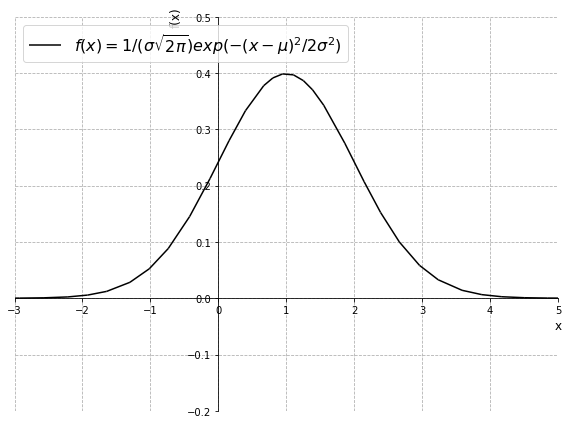

In [10]:
x = sym.Symbol("x")
mu = sym.Symbol("mu", positive = True)
sigma = sym.Symbol("sigma", positive = True)
mu = 1.0
sigma = 1.0
function = normal_distribution(x, mu, sigma)
plot_function_derivative(function, 1,
                         xlim = [-3.0, 5.0], 
                         ylim = [-0.2, 0.5], 
                         exp_function = "$f(x)=1/(\sigma\sqrt{2\pi})exp(-(x-\mu)^2/2 \sigma ^2)$",  
                         exp_derivative = "",
                         savefile = None, 
                         draw_derivative = False)

As a reference, below use *normal()* function provided by *sympy.stats* package to draw the function with same parameters.

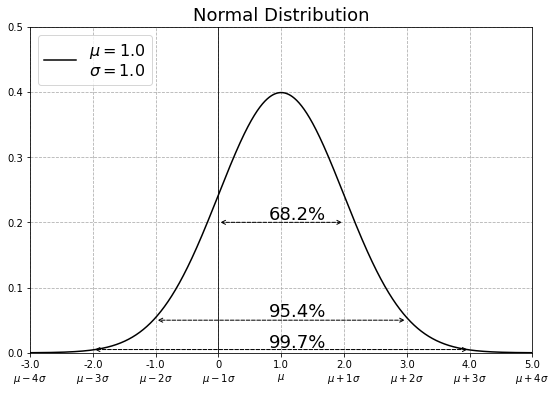

In [11]:
x = np.arange(-3, 5, 0.001)
plt.figure(figsize=(9,6))
plt.title("Normal Distribution", fontsize = 18)
plt.axis([-3, 5, 0, 0.5])
plt.plot(x, norm.pdf(x, mu, sigma), color='black', label='$μ=1.0$\n$σ=1.0$')
plt.legend()
plt.grid(True)
plt.axhline(y=0, color='k', linewidth=0.8)
plt.axvline(x=0, color='k', linewidth=0.8)
ticks, labels = plt.xticks()
labels = ['-3.0\n$μ-4σ$','-2.0\n$μ-3σ$', '-1.0\n$μ-2σ$', '0\n$μ-1σ$', '1.0\n$μ$', '2.0\n$μ+1σ$', '3.0\n$μ+2σ$', '4.0\n$μ+3σ$', '5.0\n$μ+4σ$']
plt.xticks(ticks, labels)
plt.text(0.8, 0.205, '68.2%', fontsize = 18)
plt.annotate ('', (0, 0.2), (2, 0.2), arrowprops={'arrowstyle':'<->',"linestyle":"--"})
plt.text(0.8, 0.055, '95.4%', fontsize = 18)
plt.annotate ('', (-1, 0.05), (3, 0.05), arrowprops={'arrowstyle':'<->',"linestyle":"--"})
plt.text(0.8, 0.008, '99.7%', fontsize = 18)
plt.annotate ('', (-2, 0.005), (4, 0.005), arrowprops={'arrowstyle':'<->',"linestyle":"--"})
plt.savefig("function_normal.svg", format="svg", transparent=True)
plt.show()

The above is one-dimensional normal distribution. How about multi-dimensional?

There is an n-dimensional vector $x=[x_1, x_2, ..., x_n]$ as the variables, the normal distribution is defined as:

$\large p(\boldsymbol{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^n|\boldsymbol{\Sigma}|}} \exp\left( -\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^\mathrm{T}\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right)$

where $\mu$ is an n-dimensional vector for the mean values, and $\Sigma$ is an $n \times n$ matrix for the covariances.

The *scipy* package provides a function *scipy.stats.multivariate_normal()* for multi-dimensional normal distribution, its convenient to use and hide all the complexity, just provide the correct parameters as input.

Below we will use Python to implement the above formula for 2-D normal distribution.

**Use Python to implement the above formula for 2-D:**

The function will be defined as:

```
def normal_distribution_2d(x, y, mu, Sigma):
```

The input parameter:

*   *x* and *y* are the two variables for the 2-D normal distribution. 
*   *mu* is the mean value for $\mu$, a 2-D vector.
*   *Sigma* is the covariances for $\Sigma$, a 2 by 2 matrix.

1. To implement the first part: $\large\frac{1}{\sqrt{(2\pi)^n|\boldsymbol{\Sigma}|}}$, the following three line of codes can do it, since we are doing 2-D function, so here n=2,
  ```
    n = 2
    sigma_det = np.linalg.det(Sigma)
    c = 1.0 / ((2 * np.pi)**n * sigma_det)**0.5
  ```

2. To implement the second part: $\large\left( -\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^\mathrm{T}\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right)$

  a) First calculate $\large{\Sigma}^{-1}$, it's the inverse of $\large\Sigma$ which is the input parameter of our function, a $2 \times 2$ matrix, since we are doing 2-D normal distribution. The result, inverse of $\large\Sigma$, is also a $2 \times 2$ matrix.
  ```
  sigma_inv = np.linalg.inv(Sigma)
  ```

  b) Next, $\large(\boldsymbol{x}-\boldsymbol{\mu})$ is actually a 2-D vector, $\begin{bmatrix}x-\mu_0 \\y-\mu_1\end{bmatrix}$, because we pass $x$ and $y$ as input parameter for the 2-D variables. Then $(\boldsymbol{x}-\boldsymbol{\mu})^\mathrm{T} = \begin{bmatrix}x-\mu_0 & y-\mu_1\end{bmatrix}$.

  c) Then $(\boldsymbol{x}-\boldsymbol{\mu})^\mathrm{T}\boldsymbol{\Sigma}^{-1}$ is the dot product of above two matrices, and the result is a 2-D row vector:

  $ = \begin{bmatrix}x-\mu_0 & y-\mu_1\end{bmatrix} \cdot \begin{bmatrix}\Sigma_{00}^{-1}&\Sigma_{01}^{-1}\\ \Sigma_{10}^{-1}&\Sigma_{11}^{-1}\end{bmatrix}$

  $ = \begin{bmatrix}(x-\mu_0)\cdot\Sigma^{-1}_{00} + (y-\mu_1)\cdot\Sigma^{-1}_{10} & (x-\mu_0)\cdot\Sigma^{-1}_{01} + (y-\mu_1)\cdot\Sigma^{-1}_{11}\end{bmatrix} $

  d) Lastly, calculate $((\boldsymbol{x}-\boldsymbol{\mu})^\mathrm{T}\boldsymbol{\Sigma}^{-1}) \cdot (\boldsymbol{x}-\boldsymbol{\mu})$, which is again the dot product of two vectors, the first one is the result of above step c) which is a 2D vector, and the second one is another 2D vector in step b), the result of this dot product will be a scalar.

  $(({x}-{\mu})^\mathrm{T}{\Sigma}^{-1}) \cdot ({x}-{\mu})$  

  $=\begin{bmatrix}(x-\mu_0)\cdot\Sigma^{-1}_{00} + (y-\mu_1)\cdot\Sigma^{-1}_{10} & (x-\mu_0)\cdot\Sigma^{-1}_{01} + (y-\mu_1)\cdot\Sigma^{-1}_{11}\end{bmatrix}\cdot\begin{bmatrix}x-\mu_0 \\y-\mu_1\end{bmatrix}$

  $=((x-\mu_0)\cdot\Sigma^{-1}_{00} + (y-\mu_1)\cdot\Sigma^{-1}_{10})\cdot(x-\mu_0) +( (x-\mu_0)\cdot\Sigma^{-1}_{01} + (y-\mu_1)\cdot\Sigma^{-1}_{11})\cdot(y-\mu_1)$  

  $=(x-\mu_0)^2\cdot\Sigma^{-1}_{00} + (y-\mu_1)\cdot\Sigma^{-1}_{10}\cdot(x-\mu_0) + (x-\mu_0)\cdot\Sigma^{-1}_{01}\cdot(y-\mu_1) + (y-\mu_1)^2\cdot\Sigma^{-1}_{11}$

  $=(x-\mu_0)^2\cdot\Sigma^{-1}_{00} + (x-\mu_0)(y-\mu_1)(\Sigma^{-1}_{01}+\Sigma^{-1}_{10}) + (y-\mu_1)^2\cdot\Sigma^{-1}_{11}$

  e) Finally, this is implemented as:

  ```
  e = ( ( x-mu[0] )**2 * sigma_inv[0,0] + 
         ( x-mu[0] ) * ( y-mu[1] ) * (sigma_inv[0,1] + sigma_inv[1,0]) + 
         ( y-mu[1] )**2 * sigma_inv[1,1]
       )  
  ```

Below code snippet is the implementation of *normal_distribution_2d()* function. As testing we compare our results with the *scipy.stats.multivariate_normal()*.

In [12]:
# Define 2-dimensional normal distribution function based on above formula
# https://stackoverflow.com/questions/28342968/how-to-plot-a-2d-gaussian-with-different-sigma
def normal_distribution_2d(x, y, mu, Sigma):
  n = 2                             # because this is 2-D normal distribution
  sigma_det = np.linalg.det(Sigma)  # determinant of Sigma
  c = 1.0 / ((2 * np.pi)**n * sigma_det)**0.5
  
  sigma_inv = np.linalg.inv(Sigma)  # inverse of Sigma (2x2 matrix)
  e = ( ( x-mu[0] )**2 * sigma_inv[0,0] + 
        ( x-mu[0] ) * ( y-mu[1] ) * (sigma_inv[0,1] + sigma_inv[1,0]) + 
        ( y-mu[1] )**2 * sigma_inv[1,1]
      )
  return c * np.e ** (-0.5 * e)

# Test the above function by comparing it with scipy.stats.multivariate_normal()
mu = np.array([1.0, 2.0])
Sigma = np.array([[9.0, 2.0], [4.0, 8.0]])
x = np.random.uniform(low=-1.0, high=1.0, size=(10, 2))
for i in range(len(x)):
    y1 =  normal_distribution_2d(x[i][0], x[i][1], mu, Sigma)
    y2 = multivariate_normal.pdf([x[i][0], x[i][1]], mu, Sigma)
    print(x[i], end=" --> ")
    print(y1, y2, np.isclose(y1, y2, atol=1e-2), end="\n")


[0.27950984 0.32350546] --> 0.016726429142910025 0.01782402495535978 True
[ 0.86757899 -0.44082595] --> 0.013271190291700666 0.013467757792422685 True
[0.06229446 0.15232028] --> 0.01606518216118472 0.017181248979155402 True
[0.65868745 0.73317819] --> 0.018003812800187115 0.01912135233592728 True
[ 0.14636685 -0.91618941] --> 0.011747416406633005 0.012177551280883402 True
[ 0.39304565 -0.19516617] --> 0.014747123337718951 0.01546897138032123 True
[ 0.38968483 -0.21248847] --> 0.014676760519250258 0.01538958135936242 True
[0.17016791 0.31121884] --> 0.016652472740270388 0.017795370947270756 True
[-0.01001204  0.56474812] --> 0.017284148784965606 0.01858489618147609 True
[-0.28781793  0.24993057] --> 0.016071995857599226 0.017350307259290307 True


Below is to plot the two-dimensional normal distribution with the following parameters,

$\mu = \begin{bmatrix}1 & 2\end{bmatrix}$

$\Sigma = \begin{bmatrix}9 & 2 \\4 & 8\end{bmatrix}$

In [13]:
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['savefig.transparent'] = True
plt.rcParams['savefig.bbox'] = 'tight'  
x, y = sym.symbols('x y')
mu = sym.Symbol("mu", positive = True)
Sigma = sym.Symbol("Sigma", positive = True)
mu = np.array([1.0, 2.0])
Sigma = np.array([[9.0, 2.0], [4.0, 8.0]])
function = normal_distribution_2d(x, y, mu, Sigma)
p = plot3d(function, (x, -10,10), (y, -10,10), show=False)
# p.save("function_normal_2d.png")

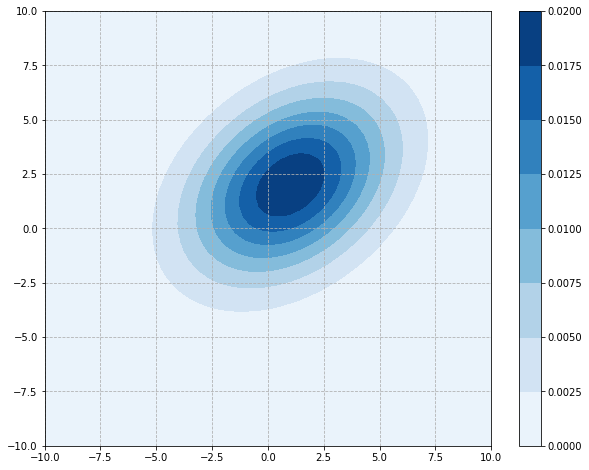

In [14]:
# Plot contour
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['savefig.transparent'] = True
plt.rcParams['savefig.bbox'] = 'tight'  
sample = 50
x = np.linspace(-10, 10, sample)
y = np.linspace(-10, 10, sample)
x, y = np.meshgrid(x, y)
z = normal_distribution_2d(x, y, mu, Sigma)
plt.contourf(x, y, z, cmap='Blues')
# plt.contour(x, y, z)
plt.colorbar()
plt.savefig("function_normal_2dctr.png", format="png", dpi=100)
plt.show()

As reference, here use *scipy.stats.multivariate_normal()* function to draw the same 2D normal distribution with same parameters.

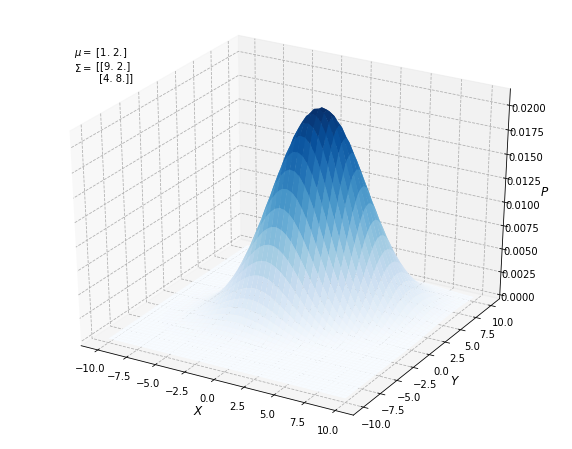

In [15]:
from mpl_toolkits import mplot3d
from scipy.stats import multivariate_normal

def plot_2d_gaussian(mu, Sigma):
    #Create grid and multivariate normal
    sample = 50
    x = np.linspace(-10,10,sample)
    y = np.linspace(-10,10,sample)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    rv = multivariate_normal(mu, Sigma)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(X, Y, rv.pdf(pos), cmap='Blues', linewidth=0)
    ax.text2D(0.12, 0.85, "$\mu=$ %s\n$\Sigma=$" % mu, transform=ax.transAxes)
    ax.text2D(0.16, 0.83, "%s" % Sigma, transform=ax.transAxes)
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    ax.set_zlabel('$P$')
    ax.axis('on')
    plt.show()
    fig.savefig("function_normal2d.png", dpi=100, format="png", transparent=True)

plot_2d_gaussian(mu, Sigma)

## 1.8 Softmax Function

Softmax is another type of probability distribution function, it transforms the input vector of n to a same size vector and sum up all its elements to 1. Each element of the output vector is between the range of [0, 1] and all the elements sum up to 1.

Softmax is also called multinomial logistic regression, each elements in its output vector is the probability of that class. Will discuss it in details in logistic regression sections later.

Softmax function is defined as:

$\sigma(x)_j=\displaystyle \frac{e^{x_j}}{ \sum_{i=1}^{n}e^{x_i}}$

In [16]:
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())

In [17]:
x = np.array([2, 5, 3])
print("x =", x)
print("softmax(x):", softmax(x))

x = [2 5 3]
softmax(x): [0.04201007 0.84379473 0.1141952 ]
